#  <span style="color:	#00ff00	">Sales Analysis</span>

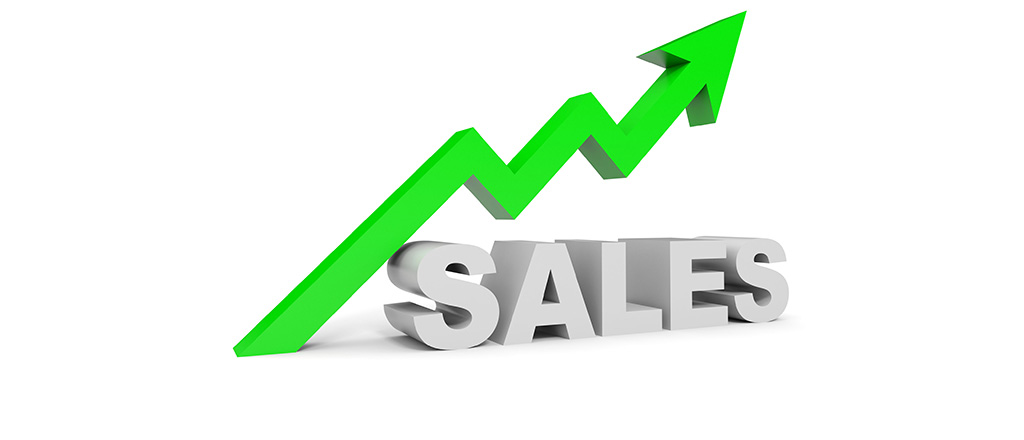

## Questions to be answered
```
1: What was the best month for sales?
2: What is the city with the largest number of sold products?
3: What time should we display advertisement to maximize the purchases likelihood ? 
4: What product sold the most? Why do you think it did
5: What products are most often sold together?
```

## Impoting data

In [133]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
files = [file for file in os.listdir('E:\S#29571\Sales_Data')]  # reading all files
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('E:\S#29571\Sales_Data\\'+file)  # read files directories
    all_data = pd.concat([all_data , df])
    
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [134]:
all_data.to_csv("all_data.csv",index=False)

In [135]:
data = pd.read_csv("all_data.csv")

In [136]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [138]:
all_data.shape

(186850, 6)

## Cleaning data

```
Renaming columns
```

In [139]:
columns_dict = {
    'Order Date':'Order_Date',
    'Purchase Address':'Purchase_Address',
    'Quantity Ordered':'Quantity_Ordered',
    'Order ID':'Order_ID',
    'Price Each':'Price_Each'
}

data.rename(columns=columns_dict , inplace=True)

In [140]:
data.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


```
Removing NAN Values
```

In [141]:
data.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [142]:
data.dropna(how='all',inplace=True)

In [143]:
data.shape

(186305, 6)

```
Fixing data types
```

In [271]:
# filtering data by removing rows which contain no months "Or"
data = data[data['month']!='Or']
# converting 'month' column to integer data type
data['month'] = data['month'].astype('int32')

In [272]:
# converting 'Price_Each' column and 'Quantity_Ordered' to numeric data type
data['Price_Each'] = pd.to_numeric(data['Price_Each'])
data['Quantity_Ordered'] = pd.to_numeric(data['Quantity_Ordered']);

In [276]:
# converting "Order_Date" column to datetime data type
data.Order_Date = pd.to_datetime(data.Order_Date)

In [277]:
# and here we can see the changes in data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   sales             185950 non-null  float64       
 8   city              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


```
Adding a new column "month"
```

In [297]:
data['month'] = data.Order_Date.dt.month

In [298]:
data['hour'] = data.Order_Date.dt.hour

In [299]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,sales,city,month,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,"Dallas, TX 75001",4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,"Boston, MA 02215",4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,"Los Angeles, CA 90001",4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,"Los Angeles, CA 90001",4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,"Los Angeles, CA 90001",4,9


```
Adding a new column "city"
```

In [301]:
data['city'] = data['Purchase_Address'].apply(lambda x: x.split('t,')[1])
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,sales,city,month,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,"Dallas, TX 75001",4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,"Boston, MA 02215",4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,"Los Angeles, CA 90001",4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,"Los Angeles, CA 90001",4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,"Los Angeles, CA 90001",4,9


```
Adding column "sales" which resulsts from multiplying Quantity_Ordered by Price_Each
```

In [179]:
data['sales'] = data['Price_Each']*data['Quantity_Ordered']

In [172]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Exploring data

> <span style="color:	#ff6666	">**1: What was the best month for sales?**</span>

In [227]:
data.groupby('month').sum()

,Quantity_Ordered,Price_Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [173]:
best_month_sales = data.groupby('month').sum()

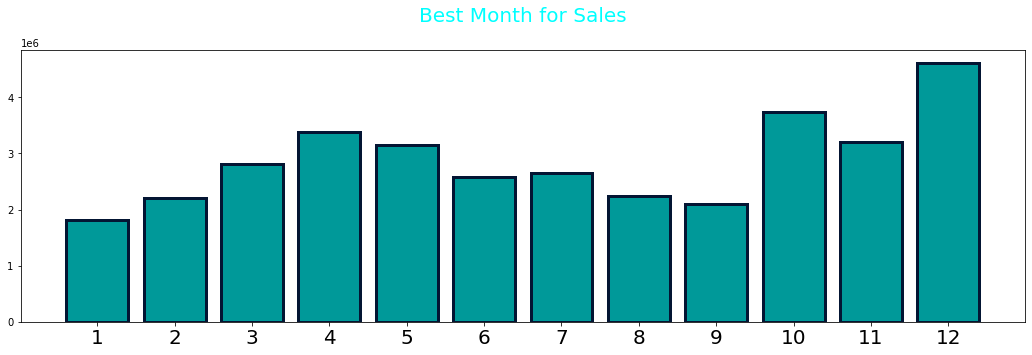

In [324]:
months = range(1,13)
plt.figure(figsize=(18,5))
plt.bar( months , best_month_sales['sales'] , color='#009999' , edgecolor='#031533' , linewidth=3)
plt.title("Best Month for Sales\n" , fontsize=20 , color='cyan')
plt.xticks(months , color='black' , fontsize=20)
plt.show();

In [248]:
data[data['month']==12]['sales'].sum()

4613443.34

* the best month for sales was clearly "December"
* Sales in December were 4613443.34

> <span style="color:	#ff6666	">**2: Which city sold the most products?**</span>

most_products_city = data.groupby('city').sum()
most_products_city

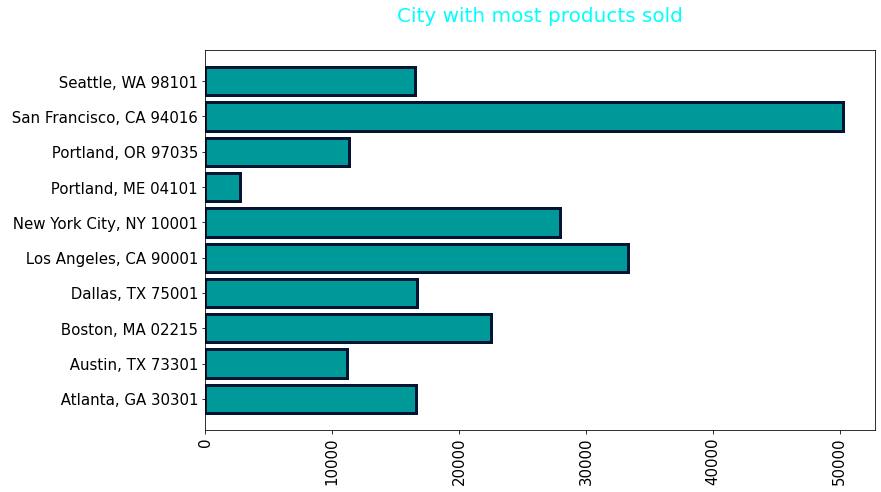

In [320]:
plt.figure(figsize=(12,7))
cities = [city for city,x in data.groupby('city')]
plt.barh(cities , most_products_city['Quantity_Ordered'] , color='#009999',  edgecolor='#031533' , linewidth=3)
plt.xticks(rotation=90 , color='black' , fontsize=15)
plt.yticks(rotation=0 , color='black' , fontsize=15)
plt.title("City with most products sold\n" , color='cyan' , fontsize=20)
plt.show();

In [243]:
data[data['city']==' San Francisco, CA 94016']['Quantity_Ordered'].sum()

50239

* The city with the largest number of sold products is "San Francisco, CA 94016"
* The amount of sild products is 50239

> <span style="color:	#ff6666	"> **3: What time should we display advertisement to maximize the purchases likelihood ?**</span> 

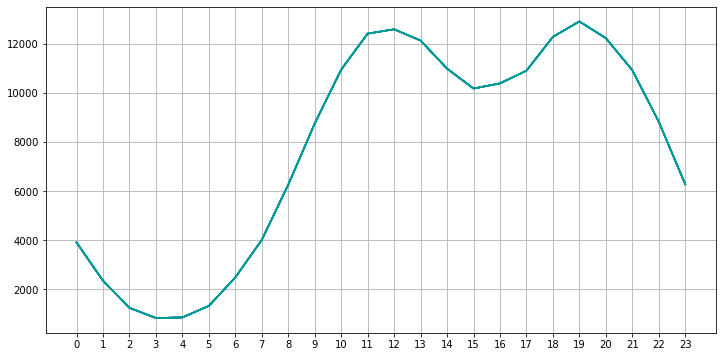

In [327]:
plt.figure(figsize=(12,6))
hours = [hour for hour,x in data.groupby('hour')]
plt.plot(hours , data.groupby('hour').count() , color='#009999')
plt.xticks(hours)
plt.grid()
plt.show();

* My recommendation is to display advertisement arround 11 AM and at 7 PM

> <span style="color:	#ff6666	"> **4: What product sold the most? Why do you think it did**</span> 


In [344]:
most_sold_products = data.groupby('Product').sum()

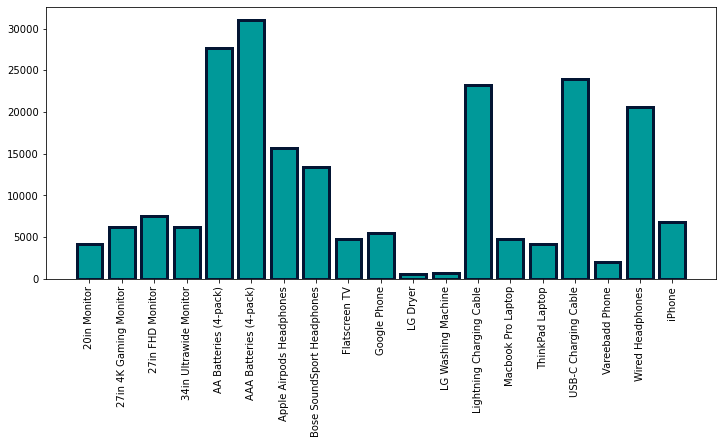

In [346]:
plt.figure(figsize=(12,5))
products = [product for product,x in data.groupby('Product')]
plt.bar(products , most_sold_products['Quantity_Ordered'],color='#009999',edgecolor='#031533',linewidth=3)
plt.xticks(products , rotation=90)
plt.show();

In [350]:
data[data.Product=='AAA Batteries (4-pack)']['Quantity_Ordered'].sum()

31017

* The most sold product is "AAA Batteries (4-pack)" 
* 31017 item sold from "AAA Batteries (4-pack)"